In [1]:
from xgboost import XGBClassifier
# read data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor


In [2]:
df = pd.read_csv('C:/Users/tahaj/OneDrive/Bureau/Stage/NightTimeLightCollection/preprocess_saudiarabia.csv',sep=";")
df.head()

,Date,SOL,GDP
0,01/01/2012,5.461777e+06,5.804692e+11
1,01/04/2012,6.578292e+06,5.728170e+11
2,01/07/2012,6.034126e+06,5.760421e+11
3,01/10/2012,6.016527e+06,5.885344e+11
4,01/01/2013,6.884214e+06,5.826578e+11


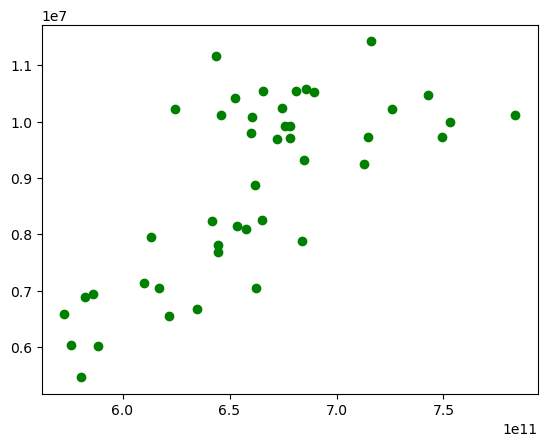

In [8]:
# afficher nuage de points
plt.scatter(df['GDP'],df['SOL'], color='green')

In [9]:
#exclure les données qui depasse 8882805.01817731 SOL
df.drop('Date', axis=1,inplace=True)
df.head()

,SOL,GDP
0,5.461777e+06,5.804692e+11
1,6.578292e+06,5.728170e+11
2,6.034126e+06,5.760421e+11
3,6.016527e+06,5.885344e+11
4,6.884214e+06,5.826578e+11


In [10]:
#diviser le data
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [11]:
print(X)
print(Y)

[[ 5461777.01418678]
 [ 6578291.85573907]
 [ 6034125.9579807 ]
 [ 6016526.88388808]
 [ 6884214.04226324]
 [ 6949335.04770931]
 [ 7039826.55092578]
 [ 6549072.735552  ]
 [ 7141323.99009409]
 [ 7959676.54887908]
 [ 6674666.35981341]
 [ 8234748.34400376]
 [ 7810978.64702194]
 [ 7690892.76752404]
 [ 8254331.54959207]
 [ 7053784.75396159]
 [ 8156421.98662606]
 [ 8101564.6952341 ]
 [ 7889040.52012902]
 [ 8882805.01817731]
 [10422718.64190626]
 [10086638.02959433]
 [10542938.09522351]
 [ 9694315.84710111]
 [10550800.81157521]
 [ 9920017.95099152]
 [ 9249804.10320838]
 [ 9319418.55720056]
 [10244402.21359114]
 [ 9705952.63739056]
 [ 9726205.07694276]
 [ 9920707.78039067]
 [10217235.92990434]
 [10120692.48362991]
 [10571050.73969234]
 [ 9799487.75725083]
 [11159650.91747583]
 [10523725.12806524]
 [10474009.89620364]
 [10218280.69444519]
 [11426390.98943982]
 [ 9728882.17649882]
 [10124629.26979067]
 [ 9991580.24826339]]
[5.80469208e+11 5.72817019e+11 5.76042082e+11 5.88534400e+11
 5.82657778e+1

In [12]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Diviser les données en ensembles d'entraînement et de test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3)

# Créer et entraîner le modèle XGBRegressor
reg = XGBRegressor()
reg.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [13]:
# Faire des prédictions sur de nouvelles données
Y_pred=reg.predict(X_test)

In [14]:
reg.predict([[6444415712027.0984]])

array([6.437211e+11], dtype=float32)

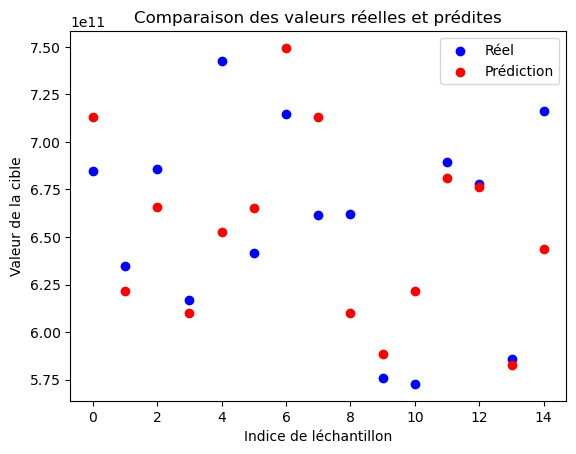

In [27]:
#visualiser les resultats
# Tracer les valeurs réelles et prédites
plt.scatter(range(len(Y_test)), Y_test, color='b', label='Réel')
plt.scatter(range(len(Y_test)), Y_pred, color='r', label='Prédiction')
plt.xlabel('Indice de l''échantillon')
plt.ylabel('Valeur de la cible')
plt.title('Comparaison des valeurs réelles et prédites')
plt.legend()
plt.show()


In [31]:
#Accuracy
# Calculer l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
print('RMSE:', rmse)


RMSE: 40451750419.15777
